Create the Currency class:

In [62]:
class Currency:
    def __init__(self, name: str, code: str):
        self.name = name
        self.code = code


Create the Region enum:

In [63]:
from enum import Enum

class Region(Enum):
    AFRICA = "Africa"
    AMERICAS = "Americas"
    ASIA = "Asia"
    EUROPE = "Europe"
    OCEANIA = "Oceania"
    ANTARCTICA = "Antarctica"


Create the Direction enum:

In [64]:
class Direction(Enum):
    LEFT = "Left"
    RIGHT = "Right"


Create the Language class:

In [65]:
class Language:
    def __init__(self, name: str, code: str):
        self.name = name
        self.code = code


Create the Country class:

In [4]:
class Country:
    def __init__(self, official_name: str, common_name: str, capital: str, region: Region, 
                 area: float, population: float, languages: list, currencies: list, 
                 driving_direction: Direction, land_locked: bool, un_member: bool):
        self.official_name = official_name
        self.common_name = common_name
        self.capital = capital
        self.region = region
        self.area = area
        self.population = population
        self.languages = languages  # List of Language objects
        self.currencies = currencies  # List of Currency objects
        self.driving_direction = driving_direction
        self.land_locked = land_locked
        self.un_member = un_member


Create the countries function: This function will return a list of Country objects. For simplicity, we'll use a few sample countries in this example.

In [5]:
def countries() -> list:
    language1 = Language("English", "EN")
    language2 = Language("French", "FR")
    currency1 = Currency("Dollar", "USD")
    currency2 = Currency("Euro", "EUR")

    usa = Country("United States of America", "USA", "Washington D.C.", Region.AMERICAS, 
                  9833517, 331002651, [language1], [currency1], Direction.RIGHT, False, True)
    france = Country("French Republic", "France", "Paris", Region.EUROPE, 
                     643801, 67081000, [language2], [currency2], Direction.RIGHT, False, True)
    return [usa, france]


Create the countries_per_region function: This function will filter countries by the provided region.

In [6]:
def countries_per_region(region: Region) -> list:
    return [country for country in countries() if country.region == region]


Create the country_for_name function: This function will find and return a country based on its name (official or common).

In [7]:
def country_for_name(name: str) -> Country:
    for country in countries():
        if country.official_name == name or country.common_name == name:
            return country
    return None


Create the countries_for_language function: This function will return all countries that speak the provided language.

In [8]:
def countries_for_language(language_name: str) -> list:
    return [country for country in countries() if any(language.name == language_name for language in country.languages)]


Part 2: Data Visualization

1.Create a histogram showing the number of countries per region:

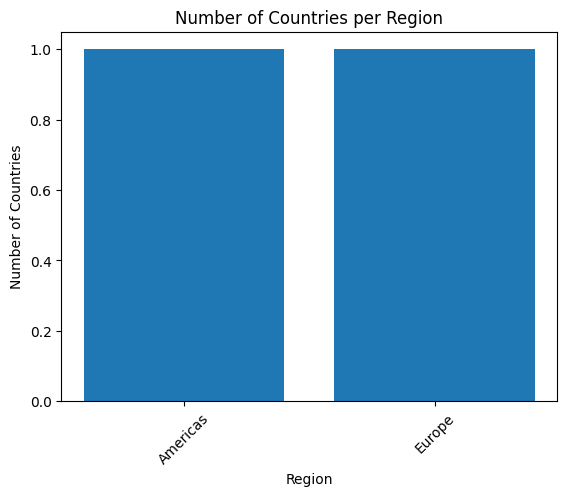

In [70]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_countries_per_region():
    all_countries = countries()
    regions = [country.region.value for country in all_countries]
    region_counts = Counter(regions)

    # Plotting
    plt.bar(region_counts.keys(), region_counts.values())
    plt.xlabel('Region')
    plt.ylabel('Number of Countries')
    plt.title('Number of Countries per Region')
    plt.xticks(rotation=45)
    plt.show()

plot_countries_per_region()


Create a histogram showing the 15 countries with the largest population:

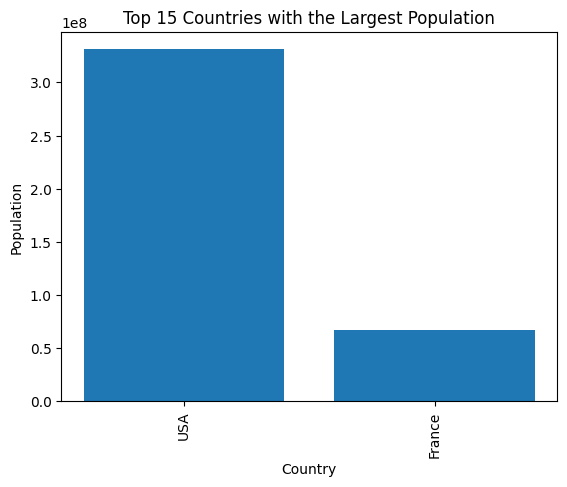

In [71]:
def plot_largest_populations():
    all_countries = countries()
    # Sort by population and get top 15
    largest_populations = sorted(all_countries, key=lambda x: x.population, reverse=True)[:15]
    country_names = [country.common_name for country in largest_populations]
    populations = [country.population for country in largest_populations]

    # Plotting
    plt.bar(country_names, populations)
    plt.xlabel('Country')
    plt.ylabel('Population')
    plt.title('Top 15 Countries with the Largest Population')
    plt.xticks(rotation=90)
    plt.show()

plot_largest_populations()


Create a histogram showing the number of countries that drive in the right and left direction

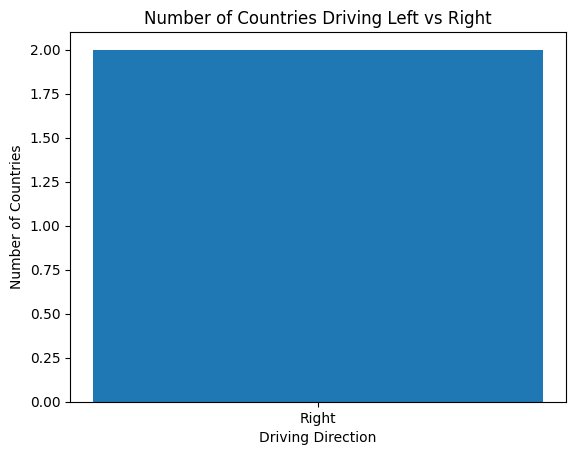

In [72]:
def plot_driving_direction():
    all_countries = countries()
    directions = [country.driving_direction.value for country in all_countries]
    direction_counts = Counter(directions)

    # Plotting
    plt.bar(direction_counts.keys(), direction_counts.values())
    plt.xlabel('Driving Direction')
    plt.ylabel('Number of Countries')
    plt.title('Number of Countries Driving Left vs Right')
    plt.show()

plot_driving_direction()


Create a histogram showing the number of countries that belong to the UN:

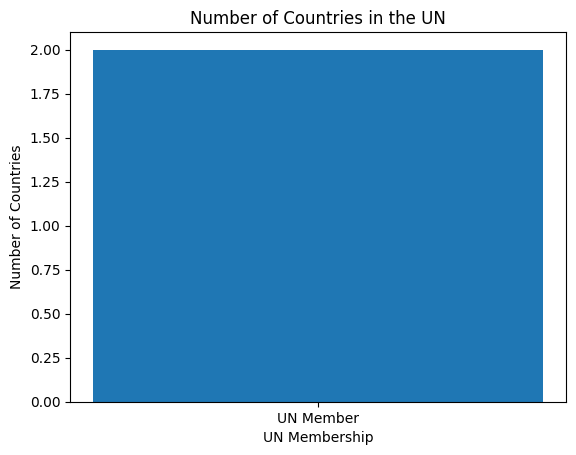

In [73]:
def plot_un_membership():
    all_countries = countries()
    un_membership = ['UN Member' if country.un_member else 'Not UN Member' for country in all_countries]
    un_counts = Counter(un_membership)

    # Plotting
    plt.bar(un_counts.keys(), un_counts.values())
    plt.xlabel('UN Membership')
    plt.ylabel('Number of Countries')
    plt.title('Number of Countries in the UN')
    plt.show()

plot_un_membership()


Create a histogram showing the number of countries that have English, Spanish, Italian, French, German, and Swedish as their primary language:

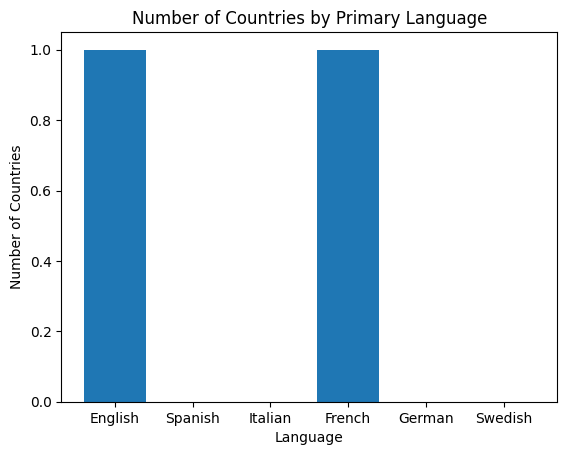

In [74]:
def plot_countries_by_language():
    target_languages = ['English', 'Spanish', 'Italian', 'French', 'German', 'Swedish']
    language_counts = {lang: 0 for lang in target_languages}

    all_countries = countries()
    for country in all_countries:
        for language in country.languages:
            if language.name in target_languages:
                language_counts[language.name] += 1

    # Plotting
    plt.bar(language_counts.keys(), language_counts.values())
    plt.xlabel('Language')
    plt.ylabel('Number of Countries')
    plt.title('Number of Countries by Primary Language')
    plt.show()

plot_countries_by_language()


Create a histogram showing the top 20 most used currencies:

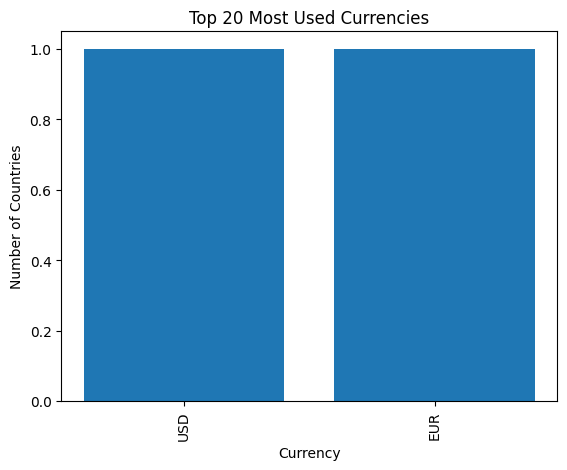

In [75]:
def plot_most_used_currencies():
    all_countries = countries()
    currencies = [currency.code for country in all_countries for currency in country.currencies]
    currency_counts = Counter(currencies)

    # Get the top 20 most used currencies
    top_currencies = currency_counts.most_common(20)
    currency_names = [currency for currency, count in top_currencies]
    currency_frequencies = [count for currency, count in top_currencies]

    # Plotting
    plt.bar(currency_names, currency_frequencies)
    plt.xlabel('Currency')
    plt.ylabel('Number of Countries')
    plt.title('Top 20 Most Used Currencies')
    plt.xticks(rotation=90)
    plt.show()

plot_most_used_currencies()
